In [1]:
import requests as rq
import json as js
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

##### Extraemos los datos del jason que nos ofrece la api de covidtracking y lo almacenamos como una tabla.

In [2]:
url='https://api.covidtracking.com/v1/states/daily.json'
api=rq.get(url)
jsre=js.loads(api.text)
tabla=pd.DataFrame(jsre)
tabla.head()

,date,state,positive,probableCases,negative,pending,totalTestResultsSource,totalTestResults,hospitalizedCurrently,hospitalizedCumulative,...,dataQualityGrade,deathIncrease,hospitalizedIncrease,hash,commercialScore,negativeRegularScore,negativeScore,positiveScore,score,grade
0,20210307,AK,56886.0,NaN,NaN,NaN,totalTestsViral,1731628.0,33.0,1293.0,...,None,0,0,dc4bccd4bb885349d7e94d6fed058e285d4be164,0,0,0,0,0,
1,20210307,AL,499819.0,107742.0,1931711.0,NaN,totalTestsPeopleViral,2323788.0,494.0,45976.0,...,None,-1,0,997207b430824ea40b8eb8506c19a93e07bc972e,0,0,0,0,0,
2,20210307,AR,324818.0,69092.0,2480716.0,NaN,totalTestsViral,2736442.0,335.0,14926.0,...,None,22,11,50921aeefba3e30d31623aa495b47fb2ecc72fae,0,0,0,0,0,
3,20210307,AS,0.0,NaN,2140.0,NaN,totalTestsViral,2140.0,NaN,NaN,...,None,0,0,f77912d0b80d579fbb6202fa1a90554fc4dc1443,0,0,0,0,0,
4,20210307,AZ,826454.0,56519.0,3073010.0,NaN,totalTestsViral,7908105.0,963.0,57907.0,...,None,5,44,0437a7a96f4471666f775e63e86923eb5cbd8cdf,0,0,0,0,0,


##### Empezaremos por obtener las columnas importantes para el presente análisis

In [3]:
tabla.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20780 entries, 0 to 20779
Data columns (total 56 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   date                         20780 non-null  int64  
 1   state                        20780 non-null  object 
 2   positive                     20592 non-null  float64
 3   probableCases                9271 non-null   float64
 4   negative                     13290 non-null  float64
 5   pending                      2138 non-null   float64
 6   totalTestResultsSource       20780 non-null  object 
 7   totalTestResults             20614 non-null  float64
 8   hospitalizedCurrently        17339 non-null  float64
 9   hospitalizedCumulative       12382 non-null  float64
 10  inIcuCurrently               11636 non-null  float64
 11  inIcuCumulative              3789 non-null   float64
 12  onVentilatorCurrently        9126 non-null   float64
 13  onVentilatorCumu

In [4]:
ta_dat=pd.DataFrame(tabla[['date','state','hospitalizedCurrently','inIcuCurrently','onVentilatorCurrently','deathConfirmed','recovered','negativeTestsAntibody','positiveTestsAntibody','totalTestsAntibody','negativeTestsViral','positiveTestsViral','totalTestsViral','positiveTestsAntigen','totalTestsAntigen','totalTestResults','negative','pending']])
ta_dat

,date,state,hospitalizedCurrently,inIcuCurrently,onVentilatorCurrently,deathConfirmed,recovered,negativeTestsAntibody,positiveTestsAntibody,totalTestsAntibody,negativeTestsViral,positiveTestsViral,totalTestsViral,positiveTestsAntigen,totalTestsAntigen,totalTestResults,negative,pending
0,20210307,AK,33.0,NaN,2.0,NaN,NaN,NaN,NaN,NaN,1660758.0,68693.0,1731628.0,NaN,NaN,1731628.0,NaN,NaN
1,20210307,AL,494.0,NaN,NaN,7963.0,295690.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2323788.0,1931711.0,NaN
2,20210307,AR,335.0,141.0,65.0,4308.0,315517.0,NaN,NaN,NaN,2480716.0,NaN,2736442.0,NaN,NaN,2736442.0,2480716.0,NaN
3,20210307,AS,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2140.0,NaN,NaN,2140.0,2140.0,NaN
4,20210307,AZ,963.0,273.0,143.0,14403.0,NaN,NaN,NaN,580569.0,NaN,NaN,7908105.0,NaN,NaN,7908105.0,3073010.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20775,20200117,WA,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
20776,20200116,WA,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
20777,20200115,WA,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
20778,20200114,WA,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


##### En este caso sera común encontrar valores vacíos en las columnas ya que los datos son manejados diariamente y puede que no haya casos de pacientes hospitalizados por Covid19. Entonces se procederá a llenar con ceros los valores nulos

In [5]:
ta_dat.isnull().mean()

date                     0.000000
state                    0.000000
hospitalizedCurrently    0.165592
inIcuCurrently           0.440038
onVentilatorCurrently    0.560828
deathConfirmed           0.546583
recovered                0.422377
negativeTestsAntibody    0.929836
positiveTestsAntibody    0.838980
totalTestsAntibody       0.769538
negativeTestsViral       0.758229
positiveTestsViral       0.568912
totalTestsViral          0.301444
positiveTestsAntigen     0.892541
totalTestsAntigen        0.835371
totalTestResults         0.007988
negative                 0.360443
pending                  0.897113
dtype: float64

In [6]:
ta_dat.replace(np.nan,0,inplace=True)


In [7]:
ta_dat.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20780 entries, 0 to 20779
Data columns (total 18 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   date                   20780 non-null  int64  
 1   state                  20780 non-null  object 
 2   hospitalizedCurrently  20780 non-null  float64
 3   inIcuCurrently         20780 non-null  float64
 4   onVentilatorCurrently  20780 non-null  float64
 5   deathConfirmed         20780 non-null  float64
 6   recovered              20780 non-null  float64
 7   negativeTestsAntibody  20780 non-null  float64
 8   positiveTestsAntibody  20780 non-null  float64
 9   totalTestsAntibody     20780 non-null  float64
 10  negativeTestsViral     20780 non-null  float64
 11  positiveTestsViral     20780 non-null  float64
 12  totalTestsViral        20780 non-null  float64
 13  positiveTestsAntigen   20780 non-null  float64
 14  totalTestsAntigen      20780 non-null  float64
 15  to

##### Para el caso de tipos de variables se puede observar que la fecha está como entero por lo cual se procederá a corregir con el formato correcto de fecha

In [8]:
ta_dat["date"]=pd.to_datetime(ta_dat.date,format="%Y%m%d")
ta_dat.dtypes

date                     datetime64[ns]
state                            object
hospitalizedCurrently           float64
inIcuCurrently                  float64
onVentilatorCurrently           float64
deathConfirmed                  float64
recovered                       float64
negativeTestsAntibody           float64
positiveTestsAntibody           float64
totalTestsAntibody              float64
negativeTestsViral              float64
positiveTestsViral              float64
totalTestsViral                 float64
positiveTestsAntigen            float64
totalTestsAntigen               float64
totalTestResults                float64
negative                        float64
pending                         float64
dtype: object

##### Creamos columnas de año y mes en texto y numero para su mejor análisis. Será necesario los meses representados en número para ordenarlos adecuadamente.

In [9]:
ta_dat['Year']=ta_dat['date'].dt.year.astype(str)
ta_dat['numMonth']=ta_dat['date'].dt.month
ta_dat['Month']=ta_dat['date'].dt.month_name()
ta_dat

,date,state,hospitalizedCurrently,inIcuCurrently,onVentilatorCurrently,deathConfirmed,recovered,negativeTestsAntibody,positiveTestsAntibody,totalTestsAntibody,...,positiveTestsViral,totalTestsViral,positiveTestsAntigen,totalTestsAntigen,totalTestResults,negative,pending,Year,numMonth,Month
0,2021-03-07,AK,33.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,...,68693.0,1731628.0,0.0,0.0,1731628.0,0.0,0.0,2021,3,March
1,2021-03-07,AL,494.0,0.0,0.0,7963.0,295690.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,2323788.0,1931711.0,0.0,2021,3,March
2,2021-03-07,AR,335.0,141.0,65.0,4308.0,315517.0,0.0,0.0,0.0,...,0.0,2736442.0,0.0,0.0,2736442.0,2480716.0,0.0,2021,3,March
3,2021-03-07,AS,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,2140.0,0.0,0.0,2140.0,2140.0,0.0,2021,3,March
4,2021-03-07,AZ,963.0,273.0,143.0,14403.0,0.0,0.0,0.0,580569.0,...,0.0,7908105.0,0.0,0.0,7908105.0,3073010.0,0.0,2021,3,March
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20775,2020-01-17,WA,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2020,1,January
20776,2020-01-16,WA,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2020,1,January
20777,2020-01-15,WA,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2020,1,January
20778,2020-01-14,WA,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2020,1,January


##### Agrupo en una lista las columnas importantes y agrupamoos los datos según el país, año y mes.

In [10]:
lta=['hospitalizedCurrently','inIcuCurrently','onVentilatorCurrently','deathConfirmed','recovered','negativeTestsAntibody','positiveTestsAntibody','totalTestsAntibody','negativeTestsViral','positiveTestsViral','totalTestsViral','positiveTestsAntigen','totalTestsAntigen','totalTestResults','negative','pending']
lta

['hospitalizedCurrently',
 'inIcuCurrently',
 'onVentilatorCurrently',
 'deathConfirmed',
 'recovered',
 'negativeTestsAntibody',
 'positiveTestsAntibody',
 'totalTestsAntibody',
 'negativeTestsViral',
 'positiveTestsViral',
 'totalTestsViral',
 'positiveTestsAntigen',
 'totalTestsAntigen',
 'totalTestResults',
 'negative',
 'pending']

In [11]:

info_or=ta_dat.groupby(['state','Year','numMonth','Month'])[lta].sum()
#info_or.index=info_or.index.droplevel('numMonth')
info_or


hospitalizedCurrently  inIcuCurrently  \
state Year numMonth Month                                             
AK    2020 3        March                       0.0             0.0   
           4        April                     386.0             0.0   
           5        May                       379.0             0.0   
           6        June                      422.0             0.0   
           7        July                      952.0             0.0   
...                                             ...             ...   
WY    2020 11       November                 5705.0             0.0   
           12       December                 5477.0             0.0   
      2021 1        January                  2703.0             0.0   
           2        February                 1020.0             0.0   
           3        March                     162.0             0.0   

                              onVentilatorCurrently  deathConfirmed  \
state Year numMonth Month                                             
AK    2020 3        March                       0.0             0.0   
           4        April                       0.0             0.0   
           5        May                         5.0           287.0   
           6        June                       39.0           351.0   
           7        July                       46.0           558.0   
...                                             ...             ...   
WY    2020 11       November                    0.0             0.0   
           12       December                    0.0             0.0   
      2021 1        January                     0.0             0.0   
           2        February                    0.0             0.0   
           3        March                       0.0             0.0   

                              recovered  negativeTestsAntibody  \
state Year numMonth Month                                        
AK    2020 3        March           0.0                    0.0   
           4        April        3435.0                    0.0   
           5        May         10238.0                    0.0   
           6        June        13167.0                    0.0   
           7        July        21184.0                    0.0   
...                                 ...                    ...   
WY    2020 11       November   430218.0                    0.0   
           12       December  1120354.0                    0.0   
      2021 1        January   1441192.0                    0.0   
           2        February  1450373.0                    0.0   
           3        March      374093.0                    0.0   

                              positiveTestsAntibody  totalTestsAntibody  \
state Year numMonth Month                                                 
AK    2020 3        March                       0.0                 0.0   
           4        April                       0.0                 0.0   
           5        May                         0.0                 0.0   
           6        June                        0.0                 0.0   
           7        July                        0.0                 0.0   
...                                             ...                 ...   
WY    2020 11       November                    0.0                 0.0   
           12       December                    0.0                 0.0   
      2021 1        January                     0.0                 0.0   
           2        February                    0.0                 0.0   
           3        March                       0.0                 0.0   

                              negativeTestsViral  positiveTestsViral  \
state Year numMonth Month                                              
AK    2020 3        March                    0.0                 0.0   
           4        April                    0.0                 0.0   
           5        May                      0.0           

##### Se puede analizar en base a 4 aspectos: muertes, hospitalizados, recuperados y casos positivos 

##### Analizaré los 5 primeros estados con más muertes por casos de covid en el primer año de la pandemia.

In [62]:
top5paises=pd.DataFrame(ta_dat.groupby(['state','Year'])['deathConfirmed'].sum().sort_values(ascending=False).head(5))
top5paises.reset_index(inplace=True)

Text(0.5, 1.0, 'TOP 5 Number of Deaths in the US by State')

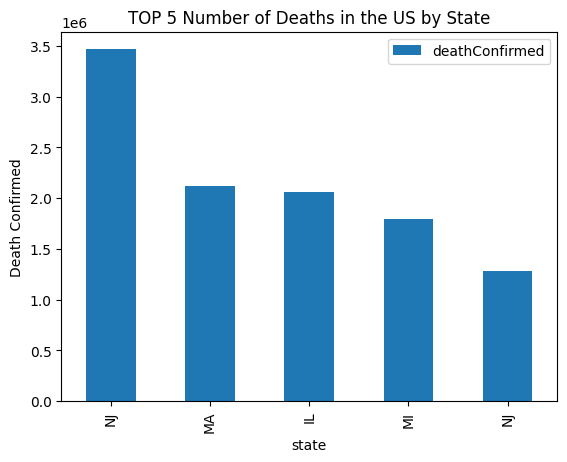

In [63]:
top5paises.set_index('state').drop('Year',axis=1).plot(kind='bar')
plt.ylabel('Death Confirmed')
plt.title('TOP 5 Number of Deaths in the US by State')

##### Del grafico el estado de Nueva Jersey fue el mas afectado con un mayor numero de muertes

In [51]:
info_or.reset_index().set_index(['state','Month'])

Year  numMonth  hospitalizedCurrently  inIcuCurrently  \
state Month                                                             
AK    March     2020         3                    0.0             0.0   
      April     2020         4                  386.0             0.0   
      May       2020         5                  379.0             0.0   
      June      2020         6                  422.0             0.0   
      July      2020         7                  952.0             0.0   
...              ...       ...                    ...             ...   
WY    November  2020        11                 5705.0             0.0   
      December  2020        12                 5477.0             0.0   
      January   2021         1                 2703.0             0.0   
      February  2021         2                 1020.0             0.0   
      March     2021         3                  162.0             0.0   

                onVentilatorCurrently  deathConfirmed  recovered  \
state Month                                                        
AK    March                       0.0             0.0        0.0   
      April                       0.0             0.0     3435.0   
      May                         5.0           287.0    10238.0   
      June                       39.0           351.0    13167.0   
      July                       46.0           558.0    21184.0   
...                               ...             ...        ...   
WY    November                    0.0             0.0   430218.0   
      December                    0.0             0.0  1120354.0   
      January                     0.0             0.0  1441192.0   
      February                    0.0             0.0  1450373.0   
      March                       0.0             0.0   374093.0   

                negativeTestsAntibody  positiveTestsAntibody  \
state Month                                                    
AK    March                       0.0                    0.0   
      April                       0.0                    0.0   
      May                         0.0                    0.0   
      June                        0.0                    0.0   
      July                        0.0                    0.0   
...                               ...                    ...   
WY    November                    0.0                    0.0   
      December                    0.0                    0.0   
      January                     0.0                    0.0   
      February                    0.0                    0.0   
      March                       0.0                    0.0   

                totalTestsAntibody  negativeTestsViral  positiveTestsViral  \
state Month                                                                  
AK    March                    0.0                 0.0                 0.0   
      April                    0.0                 0.0                 0.0   
      May                      0.0                 0.0                 0.0   
      June                     0.0                 0.0                 0.0   
      July                     0.0                 0.0                 0.0   
...                            ...                 ...                 ...   
WY    November                 0.0           9832459.0            689138.0   
      December                 0.0          12950033.0           1094036.0   
      January                  0.0          15954476.0           1304539.0   
      February                 0.0          16547864.0           1147933.0   
      March                    0.0           4192563.0            272504.0   

                totalTestsViral  positiveTestsAntigen  totalTestsAntigen  \
state Month                                                                
AK    March             25840.0                   0.0                0.0   
      April            303167.0                   0.0                0.0   
      May             1068884

In [59]:
info_or.loc['AK',:,:,:]

,Year,numMonth,Month,hospitalizedCurrently,inIcuCurrently,onVentilatorCurrently,deathConfirmed,recovered,negativeTestsAntibody,positiveTestsAntibody,totalTestsAntibody,negativeTestsViral,positiveTestsViral,totalTestsViral,positiveTestsAntigen,totalTestsAntigen,totalTestResults,negative,pending
0,2020,3,March,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,25840.0,0.0,0.0,25840.0,0.0,68.0
1,2020,4,April,386.0,0.0,0.0,0.0,3435.0,0.0,0.0,0.0,0.0,0.0,303167.0,0.0,0.0,303167.0,0.0,0.0
2,2020,5,May,379.0,0.0,5.0,287.0,10238.0,0.0,0.0,0.0,0.0,0.0,1068884.0,0.0,0.0,1068884.0,0.0,0.0
3,2020,6,June,422.0,0.0,39.0,351.0,13167.0,0.0,0.0,0.0,0.0,0.0,2388182.0,0.0,0.0,2388182.0,0.0,0.0
4,2020,7,July,952.0,0.0,46.0,558.0,21184.0,0.0,0.0,0.0,0.0,0.0,5118989.0,0.0,0.0,5118989.0,0.0,0.0
5,2020,8,August,1281.0,0.0,152.0,912.0,47187.0,0.0,0.0,0.0,7912288.0,127304.0,9301711.0,0.0,0.0,9301711.0,0.0,0.0
6,2020,9,September,1257.0,0.0,307.0,1359.0,80142.0,0.0,0.0,0.0,12142515.0,202132.0,12353178.0,0.0,0.0,12353178.0,0.0,0.0
7,2020,10,October,1800.0,0.0,226.0,2017.0,192632.0,0.0,0.0,0.0,15967397.0,330983.0,16307957.0,0.0,0.0,16307957.0,0.0,0.0
8,2020,11,November,3838.0,0.0,406.0,2972.0,114311.0,0.0,0.0,0.0,24709675.0,817244.0,25543403.0,0.0,0.0,25543403.0,0.0,0.0
9,2020,12,December,4053.0,0.0,484.0,5362.0,0.0,0.0,0.0,0.0,34398761.0,1493115.0,35931241.0,0.0,0.0,35931241.0,0.0,0.0


In [60]:

Alaska=info_or.loc['AK',:,:,:].reset_index().set_index(['Year','Month'])['deathConfirmed']
Alaska

Year  Month    
2020  March           0.0
      April           0.0
      May           287.0
      June          351.0
      July          558.0
      August        912.0
      September    1359.0
      October      2017.0
      November     2972.0
      December     5362.0
2021  January       636.0
      February        0.0
      March           0.0
Name: deathConfirmed, dtype: float64

Text(0.5, 1.0, 'Confirmed death in Alaska 2020')

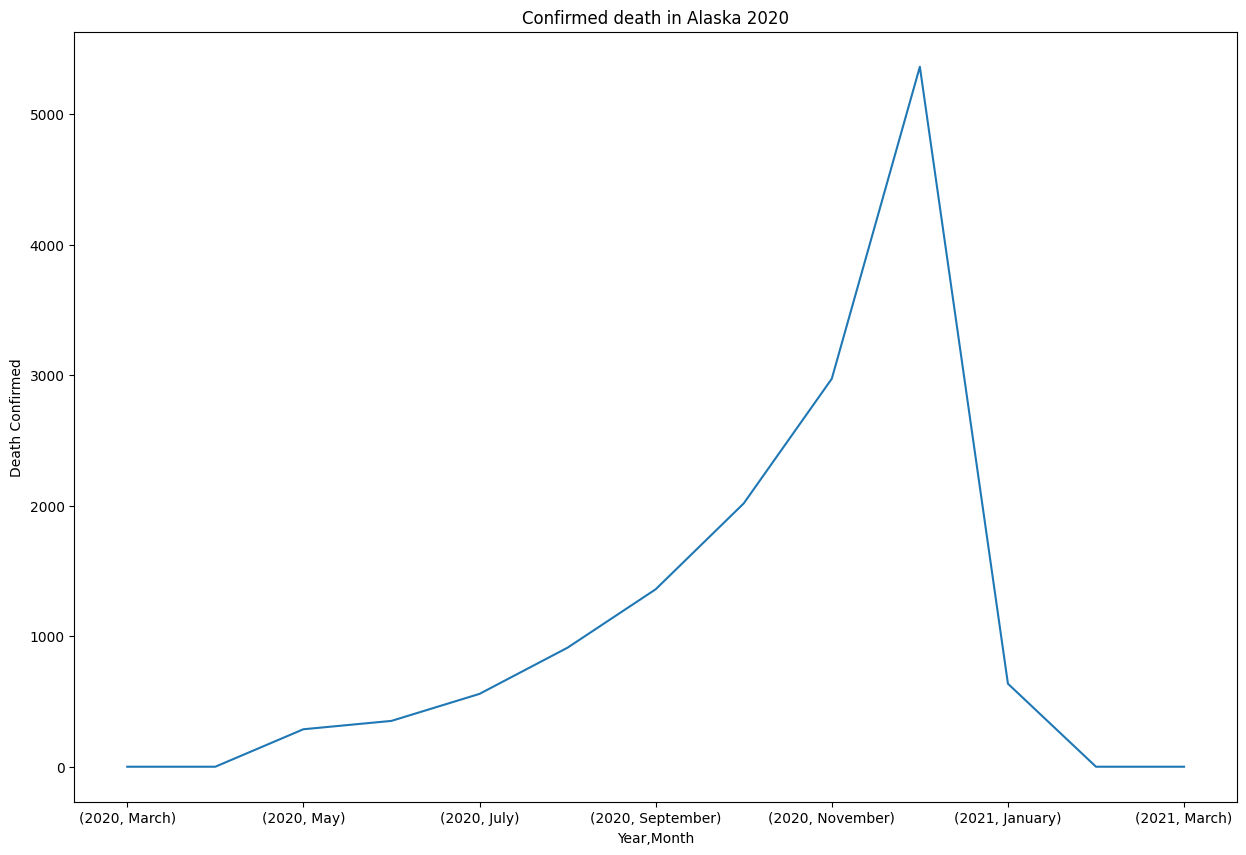

In [61]:
Alaska.plot(kind='line', figsize=(15,10))
plt.ylabel('Death Confirmed')
plt.title('Confirmed death in Alaska 2020')